# Определение перспективного тарифа для телеком компании

Получен датасет с информацией о 500 пользователях компании "Мегалайн" с целью получения выводов о том, какой из двух предложенных тарифов - "Смарт" или "Ультра" - лучше, на основании анализа поведения клиентов.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о датасете</a></span><ul class="toc-item"><li><span><a href="#Получение-информации" data-toc-modified-id="Получение-информации-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение информации</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span></li><li><span><a href="#Поиск-и-исправление-ошибок" data-toc-modified-id="Поиск-и-исправление-ошибок-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск и исправление ошибок</a></span></li><li><span><a href="#Подсчет-значений-для-пользователя" data-toc-modified-id="Подсчет-значений-для-пользователя-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подсчет значений для пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Минуты-разговора" data-toc-modified-id="Минуты-разговора-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Минуты разговора</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Интернет-трафик" data-toc-modified-id="Интернет-трафик-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Интернет-трафик</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Отличия-в-средней-выручке-по-тарифам" data-toc-modified-id="Отличия-в-средней-выручке-по-тарифам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Отличия в средней выручке по тарифам</a></span></li><li><span><a href="#Отличия-в-средней-выручке-по-регионам" data-toc-modified-id="Отличия-в-средней-выручке-по-регионам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Отличия в средней выручке по регионам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Общая информация о датасете

### Получение информации

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from IPython.display import display
from scipy import stats as st

In [2]:
# получаем датасеты

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
# выводим пять строк и инфо для таблицы calls

display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
# выводим пять строк и инфо для таблицы internet

display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
# выводим пять строк и инфо для таблицы messages

display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
# выводим пять строк и инфо для таблицы tariffs

display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
# выводим пять строк и инфо для таблицы users

display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Был открыт и изучен файл с предоставленными данными.
Он состоял из пяти таблиц, при этом в таблице users обнаружены явные нулевые значения. Также были выявлены типы данных, которые стоит заменить для уменьшения объема используемой памяти и упрощения дальнейших расчетов.

## Подготовка данных

### Приведение данных к нужным типам

In [8]:
#приведем даты к соотвествующему типу данных

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [9]:
#округлим до верхнего время звонков и использованные мегабайты

def ceil_value(value):
    return math.ceil(value)

calls['duration'] = calls['duration'].apply(ceil_value).astype('int')

internet['mb_used'] = internet['mb_used'].apply(ceil_value).astype('int')

In [10]:
#приводим к нижнему регистру значения в колонках city, first_name, last_name, tariff и меняем тип данных на category

for column in ['city', 'first_name', 'last_name', 'tariff']:
    users[column] = users[column].str.lower().astype('category')

In [11]:
#также меняем тип для таблицы tariffs и колонки tariff_name в ней на category

tariffs['tariff_name'] = tariffs['tariff_name'].astype('category')

In [12]:
#изменим объем данных с мегабайтов на гигабайты в таблице с тарифами

tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [13]:
#изменим объем данных с мегабайтов на гигабайты в таблице с инфо об израсходованном количестве интернета

internet['mb_used'] = internet['mb_used'] / 1024

### Поиск и исправление ошибок

In [14]:
# удаляем столбцы Unnamed: 0 
internet = internet.drop('Unnamed: 0', 1)

#и churn_date
users = users.drop('churn_date', 1)

In [15]:
#кроме того, у нас есть длительность звонков, равная 0:00 минут. это могут быть пропущенные, 
#или же входящие звонки, которые не будут тарифицироваться. Удаляем! 
#Но было бы лучше уточнить информацию у коллег, которые предоставили нам эту выборку.

calls = calls.drop(calls[calls.duration == 0].index).reset_index()

In [16]:
#проверяем результат

display(calls.head())

,index,id,call_date,duration,user_id
0,2,1000_2,2018-06-11,3,1000
1,3,1000_3,2018-09-21,14,1000
2,4,1000_4,2018-12-15,6,1000
3,7,1000_7,2018-08-22,19,1000
4,8,1000_8,2018-09-15,19,1000


In [17]:
display(internet)

,id,mb_used,session_date,user_id
0,1000_0,0.110352,2018-11-25,1000
1,1000_1,1.028320,2018-09-07,1000
2,1000_2,1.169922,2018-06-25,1000
3,1000_3,0.538086,2018-08-22,1000
4,1000_4,0.295898,2018-09-24,1000
...,...,...,...,...
149391,1499_152,0.311523,2018-10-03,1499
149392,1499_153,0.479492,2018-12-14,1499
149393,1499_154,0.000000,2018-10-27,1499
149394,1499_155,1.217773,2018-11-26,1499


In [18]:
# нулевые значения в интернет-сессиях заменим на 1, причиной может быть: а) просто неиспользуемый мобильный интернет
# либо б) в принципе недействующий тариф в этом месяце.
#internet['mb_used'] = internet['mb_used'].replace(0.0, 1)

нулевые значения в интернет-сессиях заменим на 1, причиной может быть: а) просто неиспользуемый мобильный интернет либо б) в принципе недействующий тариф в этом месяце.
Потестила с заменой на 1 - получаются нереальные значения, оснобенно хорошо это видно тут
plt.hist(overpayed.query('tariff == "ultra"')['payment'], alpha = 0.3, bins = 15, color = 'r', label = 'ultra')
plt.hist(overpayed.query('tariff == "smart"')['payment'], alpha = 0.3, bins = 15, color = 'b', label = 'smart')
plt.title('Гистограмма сравнения тарифов')
plt.show()

### Подсчет значений для пользователя

In [19]:
#создаем дополнительные столбцы со значением месяца для таблиц "calls" и "internet"

calls['month'] = pd.DatetimeIndex(calls['call_date']).month

internet['month'] = pd.DatetimeIndex(internet['session_date']).month

messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [20]:
#и создаем новые таблицы с группировкой по количеству использованного трафика

calls_sum = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])

messages_sum = messages.groupby(['user_id', 'month'])['id'].count()

internet_sum = internet.groupby(['user_id', 'month']).sum()['mb_used']

In [21]:
#смотрим результат для израсходованных минут по месяцам

display(calls_sum.head())

count  sum
user_id month            
1000    5         17  159
        6         28  172
        7         41  340
        8         42  408
        9         46  466

In [22]:
#смотрим результат для израсходованного интернет-трафика по месяцам

display(internet_sum.head())

user_id  month
1000     5         2.203125
         6        22.711914
         7        13.687500
         8        13.740234
         9        14.239258
Name: mb_used, dtype: float64

In [23]:
#смотрим результат для израсходованных сообщений по месяцам

display(messages_sum.head())

user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
Name: id, dtype: int64

In [24]:
#при помощи merge склеим наши полученные выше таблицы

overpayed = calls_sum.merge(messages_sum, how = 'outer', on = ['user_id', 'month'])
overpayed = overpayed.merge(internet_sum, how = 'outer', on = ['user_id', 'month'])
overpayed = overpayed.merge(users, how = 'outer', on = ['user_id'])

In [25]:
#удалим лишние колонки

for column in ['age', 'first_name', 'last_name', 'reg_date']:
    overpayed = overpayed.drop(column, 1)

In [26]:
#и переименуем оставшиеся колонки на более подходящие

overpayed.columns = ['user_id', 'calls_count', 'calls_sum', 'messages', 'gb_used', 'city', 'tariff']

In [27]:
#смотрим инфо о получившейся таблице с израсходованными звонками, интернетом и сообщениями,
#выводим ее на экран

overpayed.info()
display(overpayed)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id        3216 non-null int64
calls_count    3168 non-null float64
calls_sum      3168 non-null float64
messages       2717 non-null float64
gb_used        3203 non-null float64
city           3216 non-null category
tariff         3216 non-null category
dtypes: category(2), float64(4), int64(1)
memory usage: 160.2 KB


,user_id,calls_count,calls_sum,messages,gb_used,city,tariff
0,1000,17.0,159.0,22.0,2.203125,краснодар,ultra
1,1000,28.0,172.0,60.0,22.711914,краснодар,ultra
2,1000,41.0,340.0,75.0,13.687500,краснодар,ultra
3,1000,42.0,408.0,81.0,13.740234,краснодар,ultra
4,1000,46.0,466.0,57.0,14.239258,краснодар,ultra
...,...,...,...,...,...,...,...
3211,1489,NaN,NaN,21.0,19.128906,санкт-петербург,smart
3212,1489,NaN,NaN,20.0,17.105469,санкт-петербург,smart
3213,1489,NaN,NaN,35.0,16.934570,санкт-петербург,smart
3214,1128,NaN,NaN,NaN,NaN,волжский,ultra


Я думаю, в таблице есть пропуски из-за того, что некоторые абоненты начали пользоваться тарифом не с самого начала года, другие - закончили пользоваться тарифом где-то посреди года. Некоторые могли просто не пользоваться той или иной услугой. Заменяю NaN на нули.

In [28]:
#заменяем NaN на нули в таблице overpayed
for column in ['calls_count', 'calls_sum', 'messages', 'gb_used']:
    overpayed[column] = overpayed[column].fillna(value = 0)

In [29]:
# определим функцию, с помощью которой найдем помесячную выручку с каждого пользователя 
# (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
# остаток умножим на значение из тарифного плана; 
# прибавим абонентскую плату, соответствующую тарифному плану)

def month_calc(row):
    calls = row['calls_sum']
    messages = row['messages']
    internet = row['gb_used']
    tariff = row['tariff']
   
    # достанем лимиты по тарифам на звонки, смс и интернет
    minutes_lim = tariffs.loc[tariffs['tariff_name'] == tariff, 'minutes_included'].array[0]
    messages_lim = tariffs.loc[tariffs['tariff_name'] == tariff, 'messages_included'].array[0]
    internet_lim = tariffs.loc[tariffs['tariff_name'] == tariff, 'mb_per_month_included'].array[0]
  
    # переплата по звонкам
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_minute'].array[0]
   
    # переплата по сообщениям
    messages_overlimit = max(messages - messages_lim, 0)
    messages_overpay = messages_overlimit * tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_message'].array[0]
   
    # переплата за трафик интернета
    gb_overlimit = max(internet - internet_lim, 0)
    gb_overpay = np.ceil(gb_overlimit * tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_gb'].array[0]) 
   
    return (call_overlimit + messages_overpay + gb_overpay + tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].array[0])
 
overpayed['payment'] = overpayed.apply(month_calc, axis=1)

In [30]:
# смотрим результат работы нашей функции

display(overpayed)

,user_id,calls_count,calls_sum,messages,gb_used,city,tariff,payment
0,1000,17.0,159.0,22.0,2.203125,краснодар,ultra,1950.0
1,1000,28.0,172.0,60.0,22.711914,краснодар,ultra,1950.0
2,1000,41.0,340.0,75.0,13.687500,краснодар,ultra,1950.0
3,1000,42.0,408.0,81.0,13.740234,краснодар,ultra,1950.0
4,1000,46.0,466.0,57.0,14.239258,краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...
3211,1489,0.0,0.0,21.0,19.128906,санкт-петербург,smart,1376.0
3212,1489,0.0,0.0,20.0,17.105469,санкт-петербург,smart,972.0
3213,1489,0.0,0.0,35.0,16.934570,санкт-петербург,smart,937.0
3214,1128,0.0,0.0,0.0,0.000000,волжский,ultra,1950.0


In [31]:
# смотрим, какой зароботок был по каждому из тарифов

overpayed.pivot_table(index = 'tariff', values = 'payment', aggfunc = 'sum')

,payment
tariff,
smart,2564858.0
ultra,2031640.0


In [32]:
# вспомним, сколько у нас человек использует тот или иной тариф

users.pivot_table(index = 'tariff', values = 'user_id', aggfunc = 'count')

,user_id
tariff,
smart,351
ultra,149


### Вывод

Мы скорректировали типы данных для всех полученных таблиц, а также создали новую - которая включает в себя информацию о затратах каждого человека на оплату связи каждый месяц.

Судя по сводной таблице двумя ячейками выше, общая заработанная сумма для тарифа ultra была выше примерно в 1,17 раза, чем для тарифа smart. Но здесь не стоит забывать, что количество пользователей для обоих тарифов тоже сильно отличается - почти в 2,4 раза.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [33]:
# посмотрим информацию для каждого тарифа и суммы минут, сообщений, интернет-трафика и заработанной сумме
# для каждого значения посчитаем среднее количество, дисперсию, стандартное отклонение и медиану.

overpayed.groupby('tariff').aggregate(['mean', 'var', 'std', 'median']).drop(columns = ['user_id', 'calls_count']).astype(int)

calls_sum                     messages                  gb_used      \
            mean     var  std median     mean   var std median    mean var   
tariff                                                                       
smart        417   36281  190    421       33   796  28     28      15  33   
ultra        526  101052  317    518       49  2285  47     38      19  97   

                  payment                      
       std median    mean     var  std median  
tariff                                         
smart    5     16    1150  526750  725    858  
ultra    9     18    2060  126944  356   1950

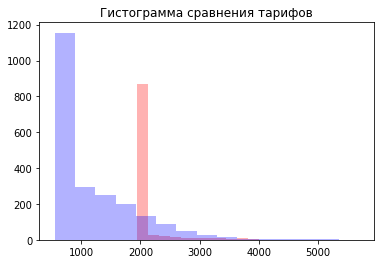

In [34]:
# отрисуем гистограмму для сравнения двух тарифов

plt.hist(overpayed.query('tariff == "ultra"')['payment'], alpha = 0.3, bins = 15, color = 'r', label = 'ultra')
plt.hist(overpayed.query('tariff == "smart"')['payment'], alpha = 0.3, bins = 15, color = 'b', label = 'smart')
plt.title('Гистограмма сравнения тарифов')
plt.show()

На этой гистограмме видим распределение Пуассона, что вполне логично - пользователи более дорогого тарифа ultra платят 1950 рублей за пользование тарифом, но в него входит большое количество трафика, поэтому переплачивать приходится редко. Многочисленные пользователи smart чаще переплачивают за дополнительные сообщения, звонки и интернет, но платят в среднем все равно меньше. 

### Минуты разговора

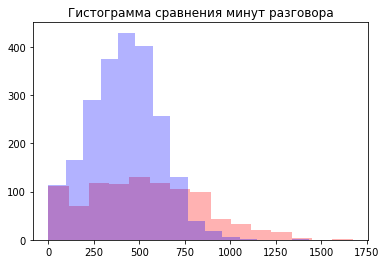

In [35]:
# отрисуем гистограмму сравнения используемых минут разговора для каждого из тарифов.

plt.hist(overpayed.query('tariff == "ultra"')['calls_sum'], alpha = 0.3, bins = 15, color = 'r', label = 'ultra')
plt.hist(overpayed.query('tariff == "smart"')['calls_sum'], alpha = 0.3, bins = 15, color = 'b', label = 'smart')
plt.title('Гистограмма сравнения минут разговора')
plt.show()

На графике видим нормальное распределение для обоих тарифов. Что же, вплоне логично - кто-то любит поговорить подольше, кто-то совсем не тратит время на звонки, но пользователи ultra явно чувствуют себя свободнее - ведь у них целых 3000 минут включено в тариф (спойлер - столько все равно никто не говорит)!

### Сообщения

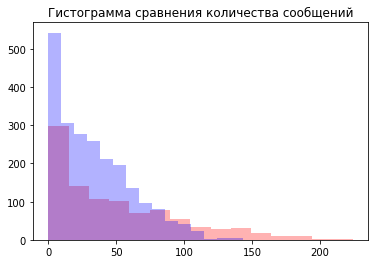

In [36]:
# отрисуем гистограмму сравнения используемых сообщений для каждого из тарифов

plt.hist(overpayed.query('tariff == "ultra"')['messages'], alpha = 0.3, bins = 15, color = 'r', label = 'ultra')
plt.hist(overpayed.query('tariff == "smart"')['messages'], alpha = 0.3, bins = 15, color = 'b', label = 'smart')
plt.title('Гистограмма сравнения количества сообщений')
plt.show()

Здесь видим распределение Пуассона, при этом для каждого набора данных наблюдается скошенность вправо. Кажется, люди разлюбили писать смс-ки.

### Интернет-трафик

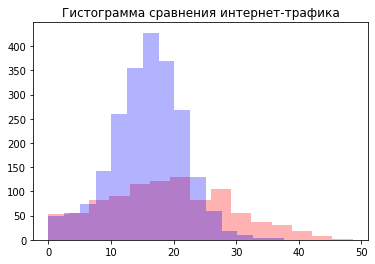

In [37]:
# отрисуем гистограмму сравнения потраченного интернет-трафика для каждого из тарифов

plt.hist(overpayed.query('tariff == "ultra"')['gb_used'], alpha = 0.3, bins = 15, color = 'r', label = 'ultra')
plt.hist(overpayed.query('tariff == "smart"')['gb_used'], alpha = 0.3, bins = 15, color = 'b', label = 'smart')
plt.title('Гистограмма сравнения интернет-трафика')
plt.show()

Нормальное распределение, как и в случае со звонками. Пользователи ultra так же тратят чуть больше интернет-трафика, но здесь у них получается выйти за границу лимита в 30ГБ.

### Вывод

Очевидно, пользователи тарифа ultra активнее расходуют свой пакет, ведь у них очень сложно выйти за обозначенный лимит. Да и переплата не такая большая - когда платишь 1950 рублей за связь, доплатить еще 150 рублей за интернет или по 1 рублю за минуту разговора не кажется чем-то из ряда вон выходящим.

Совсем другая картина складывается для пользователей тарифа smart. В среднем они укладываются в обозначенные рамки по звонкам и сообщениям, но вот интернет-трафика часто не хватает, за что приходится доплачивать. В общем (и целом) переплата для тарифа smart выше базовой стоимости тарифа в среднем в два раза (1151 руб), а медианная оплата за тариф равна 850 рублям, что в 1,5 раза выше базовой стоимости.

## Проверка гипотез

### Отличия в средней выручке по тарифам

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.
Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Пороговое значение альфа устанавливаем равным 1%.
Критерий для проверки гипотез: t-Критерий Стьюдента.
Устанавливаем equal_var = False, так как дисперсии выборок нельзя считать равными.

In [38]:
overpayed_null_off = overpayed.dropna()

In [39]:
display(overpayed_null_off.head())

,user_id,calls_count,calls_sum,messages,gb_used,city,tariff,payment
0,1000,17.0,159.0,22.0,2.203125,краснодар,ultra,1950.0
1,1000,28.0,172.0,60.0,22.711914,краснодар,ultra,1950.0
2,1000,41.0,340.0,75.0,13.687500,краснодар,ultra,1950.0
3,1000,42.0,408.0,81.0,13.740234,краснодар,ultra,1950.0
4,1000,46.0,466.0,57.0,14.239258,краснодар,ultra,1950.0


In [40]:
# проверяем нулевую гипотезу о равенстве выручки для тарифов smart и ultra

ultra = overpayed_null_off.query('tariff == "ultra"')['payment']
smart = overpayed_null_off.query('tariff == "smart"')['payment']
alpha = .01
result = st.ttest_ind(ultra, smart, equal_var = False)
print('p-value равен', result.pvalue)
if  result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value равен 0.0
Отвергаем нулевую гипотезу


### Отличия в средней выручке по регионам

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение альфа устанавливаем равным 1%.
Критерий для проверки гипотез: t-Критерий Стьюдента.
Устанавливаем equal_var = False, так как дисперсии выборок нельзя считать равными.

In [41]:
#проверяем нулевую гипотезу о равенстве выручки для Москвы и регионов

moscow = overpayed_null_off.query('city == "москва"')['payment']
regions = overpayed_null_off.query('city != "москва"')['payment']
alpha = .01
result = st.ttest_ind(moscow, regions, equal_var = False)
print('p-value равен', result.pvalue)
if  result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value равен 0.29272071498607277
Не удалось отвергнуть нулевую гипотезу


### Вывод

Мы провели два теста для подтверждения гипотез о равенстве выручки для двух тарифов - smart и ultra и о равенстве выручки для пользователей из Москвы и регионов.
При этом первая нулевая гипотеза была отвергнута с ничтожно малым шансом на совпадение средних выборок, а вторая нулевая гипотеза подтверждается.
То есть средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Общий вывод

Мы выявили проблемы в полученных таблицах - неоптимальные типы данных, пропуски и дублированные столбцы, подготовили данные к анализу. Затем нашли количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений, объем израсходованного интернет-трафика и помесячную выручку с каждого пользователя. На основании этой информации были построены гистограммы сравнения и сделаны выводы о различиях в поведении пользователей тарифов smart и ultra.

Также мы сформулировали нулевые и альтернативные гипотезы о равенстве выручки для двух тарифов - smart и ultra и о равенстве выручки для пользователей из Москвы и регионов. При этом первая гипотеза была отвергута, а вторая - подтверждена.

На основании результатов проверки первой гипотезы и полученных выводов о средних и медианных значениях потраченных минут, сообщений и интернет-трафика, а также - средних затратах пользователей в месяц на каждый из тарифов, мы делаем основной вывод для проведенного исследования - прибыль для тарифа ultra выше прибыли для тарифа smart.